In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load CSV file into a pandas dataframe
csv_file = '../../db/credit-card-approval/credit_card_approval.csv'
df = pd.read_csv(csv_file)

# Description

In [4]:
# Display description
df.describe()

,ID,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,BEGIN_MONTHS,TARGET
count,5.376700e+04,5.376700e+04,53444.000000,53459.000000,53767.0,53767.000000,53767.000000,53767.000000,53424.000000,53767.000000
mean,5.079162e+06,1.975384e+05,-15005.617113,-2755.012028,1.0,0.281213,0.299236,0.101438,-19.178347,0.003645
std,4.199008e+04,1.044198e+05,3419.682711,2387.035022,0.0,0.449596,0.457927,0.301910,14.004567,0.060267
min,5.008806e+06,2.700000e+04,-24611.000000,-15713.000000,1.0,0.000000,0.000000,0.000000,-60.000000,0.000000
25%,5.044926e+06,1.350000e+05,-17592.000000,-3657.000000,1.0,0.000000,0.000000,0.000000,-29.000000,0.000000
50%,5.079016e+06,1.800000e+05,-14785.000000,-2137.000000,1.0,0.000000,0.000000,0.000000,-17.000000,0.000000
75%,5.115749e+06,2.250000e+05,-12241.000000,-1051.000000,1.0,1.000000,1.000000,0.000000,-7.000000,0.000000
max,5.150487e+06,1.575000e+06,-7757.000000,-17.000000,1.0,1.000000,1.000000,1.000000,0.000000,1.000000


# BOXPLOT

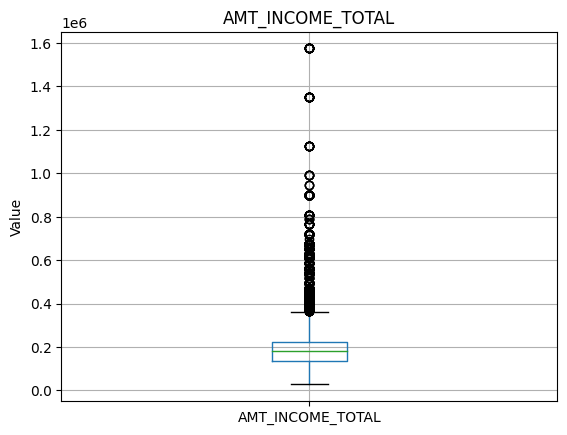

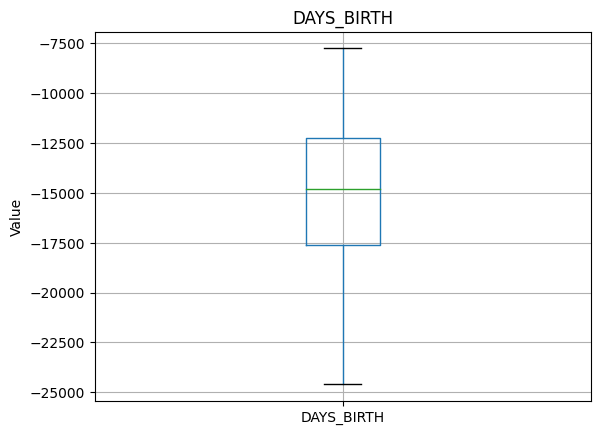

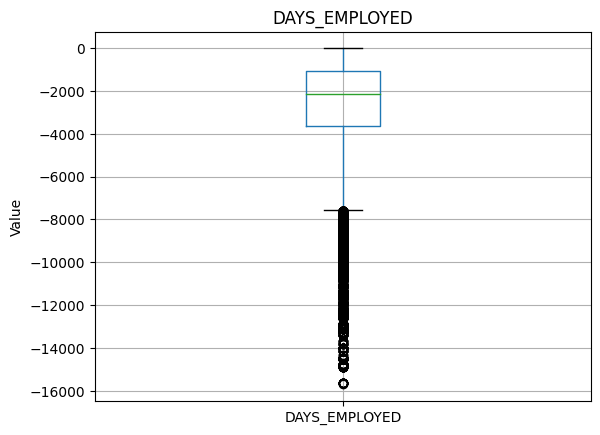

In [5]:
# Display boxplots for numeric columns
continuous_columns = ["AMT_INCOME_TOTAL", "DAYS_BIRTH", "DAYS_EMPLOYED"]

for column in continuous_columns:
    fig, ax = plt.subplots()
    df.boxplot(ax=ax, column=column)

    ax.set_ylabel('Value')
    ax.set_title(column)

    plt.savefig(f'../../media/analyse/{column}__BOXPLOT.png')

# HEATMAP

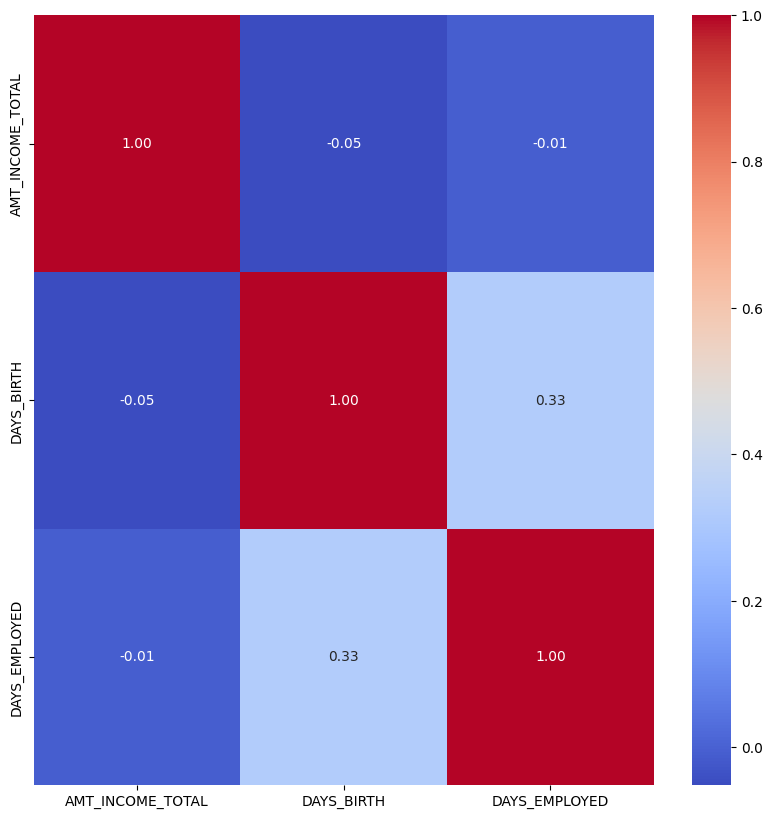

In [6]:
corr_matrix = df[continuous_columns].corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.savefig(f'../../media/analyse/HEATMAP.png')

# PAIR PLOT

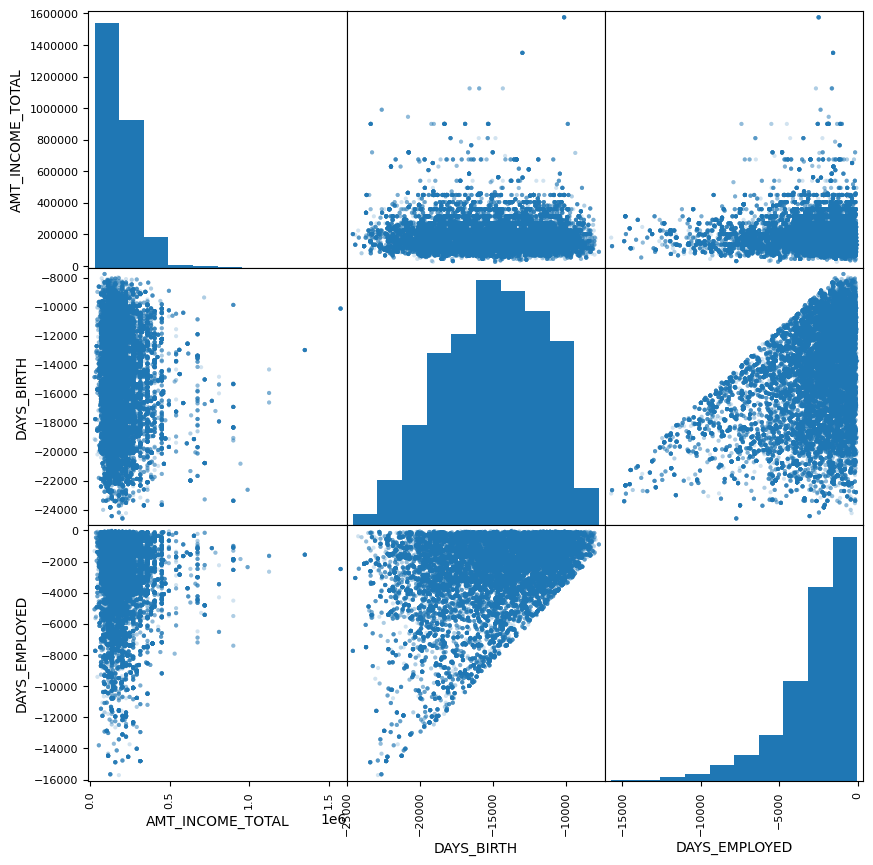

In [7]:
# pair plot
pd.plotting.scatter_matrix(df[continuous_columns], alpha=0.2, figsize=(10, 10), diagonal='hist')
plt.savefig('../../media/analyse/PAIR_PLOT.png')